Investors Silhouette Score: 0.3051660119144369
Investors Davies-Bouldin Index: 0.9968996481855621
Ideas Silhouette Score: 0.49539961073150407
Ideas Davies-Bouldin Index: 0.5226138381224459
Investors Agglomerative Silhouette Score: 0.24008629157484507
Investors Agglomerative Davies-Bouldin Index: 0.9466272154505277
Ideas Agglomerative Silhouette Score: 0.5386681447516791
Ideas Agglomerative Davies-Bouldin Index: 0.39500404494577984
Number of samples in ideas: 23


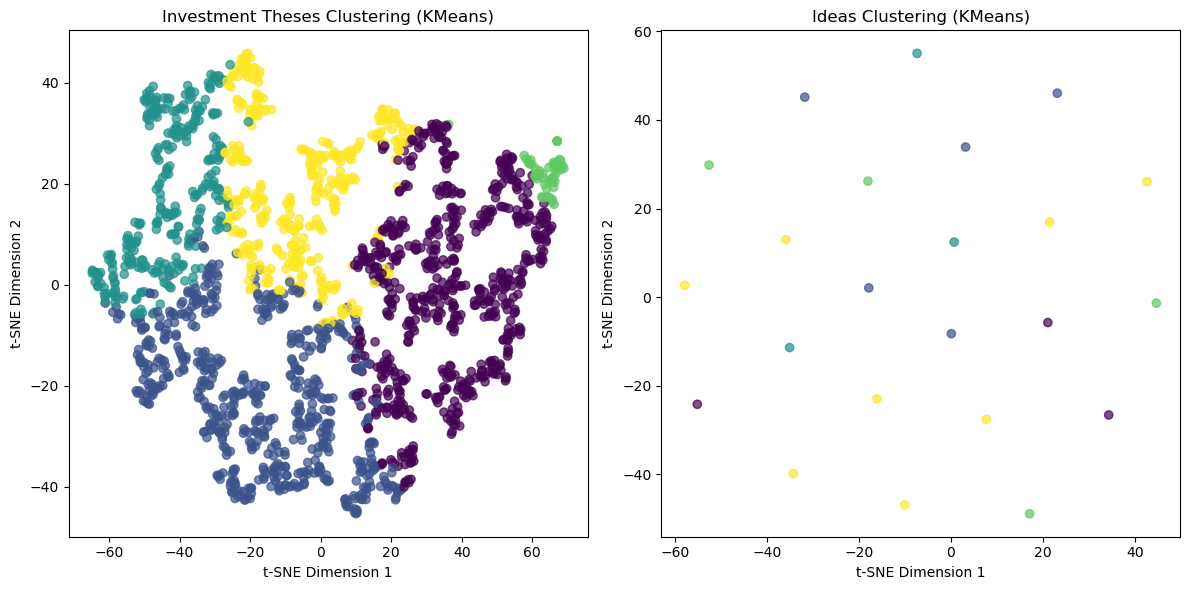

In [6]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec, Phrases
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import MiniBatchKMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Load datasets
investors_df = pd.read_csv('cleaned_openvc.csv')
ideas_df = pd.read_csv('cleaned_ideas.csv')

# Fill NaN values with an empty string
ideas_df['idea_description'] = ideas_df['idea_description'].fillna("")

# Preprocess the text
def preprocess_text(text):
    text = re.sub(r'\W+', ' ', text)  # Remove punctuation
    return text.lower().split()  # Lowercase and split into words

# Prepare data for Word2Vec training
investment_sentences = investors_df['Investment thesis'].apply(preprocess_text).tolist()
idea_sentences = ideas_df['idea_description'].apply(preprocess_text).tolist()

# Combine sentences from both datasets
all_sentences = investment_sentences + idea_sentences

# Train Word2Vec model
model = Word2Vec(sentences=all_sentences, vector_size=200, window=10, min_count=5, workers=4)

# Function to compute average word vectors for a given text
def compute_text_embedding(text, model):
    words = preprocess_text(text)
    valid_words = [model.wv[word] for word in words if word in model.wv]
    if valid_words:
        return np.mean(valid_words, axis=0)
    else:
        return np.zeros(model.vector_size)  # Return a zero vector if no valid words are found

# Compute embeddings for investment thesis and idea descriptions
investors_embeddings = investors_df['Investment thesis'].apply(lambda x: compute_text_embedding(x, model))
ideas_embeddings = ideas_df['idea_description'].apply(lambda x: compute_text_embedding(x, model))

# Convert to DataFrame for easy manipulation
investors_embeddings_df = pd.DataFrame(investors_embeddings.tolist())
ideas_embeddings_df = pd.DataFrame(ideas_embeddings.tolist())

# Clustering
n_clusters = 5  # Define the number of clusters
kmeans_investors = MiniBatchKMeans(n_clusters=n_clusters)
investors_clusters = kmeans_investors.fit_predict(investors_embeddings_df)

kmeans_ideas = MiniBatchKMeans(n_clusters=n_clusters)
ideas_clusters = kmeans_ideas.fit_predict(ideas_embeddings_df)

# Evaluate clustering performance
investors_silhouette = silhouette_score(investors_embeddings_df, investors_clusters)
investors_davies_bouldin = davies_bouldin_score(investors_embeddings_df, investors_clusters)

ideas_silhouette = silhouette_score(ideas_embeddings_df, ideas_clusters)
ideas_davies_bouldin = davies_bouldin_score(ideas_embeddings_df, ideas_clusters)

print("Investors Silhouette Score:", investors_silhouette)
print("Investors Davies-Bouldin Index:", investors_davies_bouldin)
print("Ideas Silhouette Score:", ideas_silhouette)
print("Ideas Davies-Bouldin Index:", ideas_davies_bouldin)

# Clustering with Agglomerative Clustering
agg_investors = AgglomerativeClustering(n_clusters=n_clusters)
investors_agg_clusters = agg_investors.fit_predict(investors_embeddings_df)

agg_ideas = AgglomerativeClustering(n_clusters=n_clusters)
ideas_agg_clusters = agg_ideas.fit_predict(ideas_embeddings_df)

# Evaluate clustering performance for Agglomerative Clustering
investors_agg_silhouette = silhouette_score(investors_embeddings_df, investors_agg_clusters)
investors_agg_davies_bouldin = davies_bouldin_score(investors_embeddings_df, investors_agg_clusters)

ideas_agg_silhouette = silhouette_score(ideas_embeddings_df, ideas_agg_clusters)
ideas_agg_davies_bouldin = davies_bouldin_score(ideas_embeddings_df, ideas_agg_clusters)

print("Investors Agglomerative Silhouette Score:", investors_agg_silhouette)
print("Investors Agglomerative Davies-Bouldin Index:", investors_agg_davies_bouldin)
print("Ideas Agglomerative Silhouette Score:", ideas_agg_silhouette)
print("Ideas Agglomerative Davies-Bouldin Index:", ideas_agg_davies_bouldin)

# Check the number of samples in ideas_embeddings_df
n_samples_ideas = ideas_embeddings_df.shape[0]
print(f"Number of samples in ideas: {n_samples_ideas}")

# Set perplexity to be less than the number of samples
perplexity_value = min(30, n_samples_ideas - 1)  # Set to 30 or n_samples - 1, whichever is smaller

# Dimensionality Reduction for Visualization using t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity_value)
investors_embeddings_2d = tsne.fit_transform(investors_embeddings_df)
ideas_embeddings_2d = tsne.fit_transform(ideas_embeddings_df)

# Visualization
plt.figure(figsize=(12, 6))

# Plot investors
plt.subplot(1, 2, 1)
plt.scatter(investors_embeddings_2d[:, 0], investors_embeddings_2d[:, 1], c=investors_clusters, cmap='viridis', marker='o', alpha=0.7)
plt.title('Investment Theses Clustering (KMeans)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Plot ideas
plt.subplot(1, 2, 2)
plt.scatter(ideas_embeddings_2d[:, 0], ideas_embeddings_2d[:, 1], c=ideas_clusters, cmap='viridis', marker='o', alpha=0.7)
plt.title('Ideas Clustering (KMeans)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.tight_layout()
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/camellia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/camellia/nltk_data...


Investors DBSCAN Silhouette Score: 0.8655025912164847
Investors DBSCAN Davies-Bouldin Index: 0.20330845267472497
Ideas DBSCAN Silhouette Score: 0.4319182185869762
Ideas DBSCAN Davies-Bouldin Index: 2.242154473778243


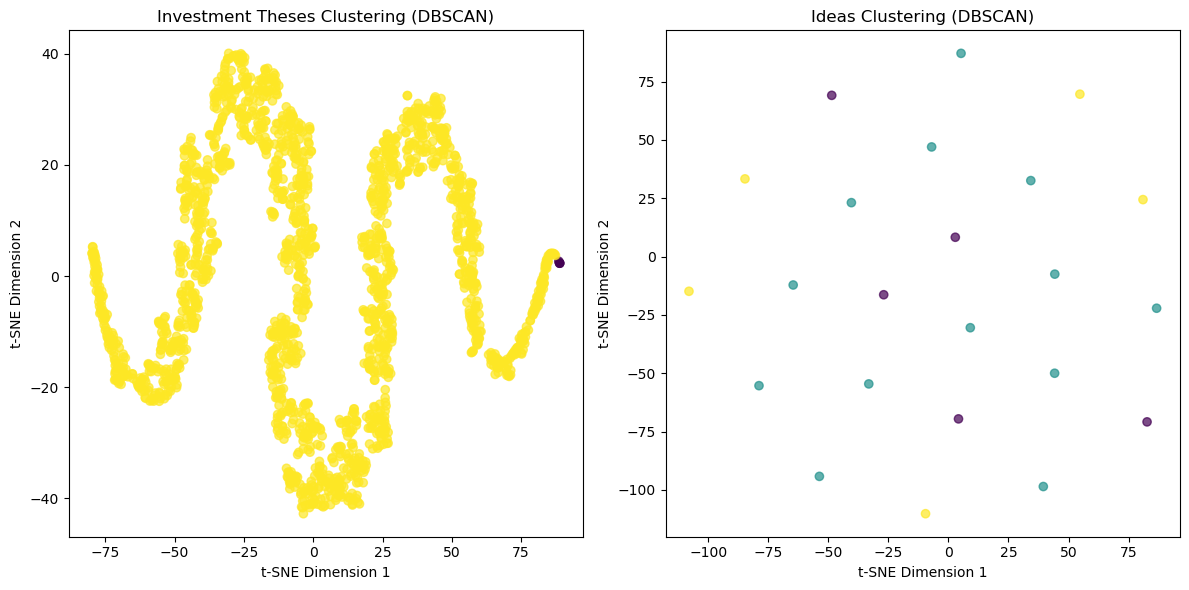

In [4]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import MiniBatchKMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Load datasets
investors_df = pd.read_csv('cleaned_openvc.csv')
ideas_df = pd.read_csv('cleaned_ideas.csv')

# Fill NaN values with an empty string
ideas_df['idea_description'] = ideas_df['idea_description'].fillna("")

# Preprocess the text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'\W+', ' ', text)  # Remove punctuation
    words = text.lower().split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatize and remove stopwords
    return words

# Prepare data for Word2Vec training
investment_sentences = investors_df['Investment thesis'].apply(preprocess_text).tolist()
idea_sentences = ideas_df['idea_description'].apply(preprocess_text).tolist()

# Combine sentences from both datasets
all_sentences = investment_sentences + idea_sentences

# Train Word2Vec model
model = Word2Vec(sentences=all_sentences, vector_size=200, window=10, min_count=5, workers=4)

# Function to compute average word vectors for a given text
def compute_text_embedding(text, model):
    words = preprocess_text(text)
    valid_words = [model.wv[word] for word in words if word in model.wv]
    if valid_words:
        return np.mean(valid_words, axis=0)
    else:
        return np.zeros(model.vector_size)

# Compute embeddings for investment thesis and idea descriptions
investors_embeddings = investors_df['Investment thesis'].apply(lambda x: compute_text_embedding(x, model))
ideas_embeddings = ideas_df['idea_description'].apply(lambda x: compute_text_embedding(x, model))

# Convert to DataFrame for easy manipulation
investors_embeddings_df = pd.DataFrame(investors_embeddings.tolist())
ideas_embeddings_df = pd.DataFrame(ideas_embeddings.tolist())

# Clustering with optimized DBSCAN
dbscan_investors = DBSCAN(eps=0.3, min_samples=4)  # Adjusted parameters
investors_dbscan_clusters = dbscan_investors.fit_predict(investors_embeddings_df)

dbscan_ideas = DBSCAN(eps=0.3, min_samples=4)  # Adjusted parameters
ideas_dbscan_clusters = dbscan_ideas.fit_predict(ideas_embeddings_df)

# Evaluate clustering performance for DBSCAN
investors_dbscan_silhouette = silhouette_score(investors_embeddings_df, investors_dbscan_clusters) if len(set(investors_dbscan_clusters)) > 1 else -1
investors_dbscan_davies_bouldin = davies_bouldin_score(investors_embeddings_df, investors_dbscan_clusters) if len(set(investors_dbscan_clusters)) > 1 else -1

ideas_dbscan_silhouette = silhouette_score(ideas_embeddings_df, ideas_dbscan_clusters) if len(set(ideas_dbscan_clusters)) > 1 else -1
ideas_dbscan_davies_bouldin = davies_bouldin_score(ideas_embeddings_df, ideas_dbscan_clusters) if len(set(ideas_dbscan_clusters)) > 1 else -1

print("Investors DBSCAN Silhouette Score:", investors_dbscan_silhouette)
print("Investors DBSCAN Davies-Bouldin Index:", investors_dbscan_davies_bouldin)
print("Ideas DBSCAN Silhouette Score:", ideas_dbscan_silhouette)
print("Ideas DBSCAN Davies-Bouldin Index:", ideas_dbscan_davies_bouldin)

# Dimensionality Reduction for Visualization using t-SNE
# Set perplexity based on sample size
n_samples_ideas = ideas_embeddings_df.shape[0]
perplexity_value = min(30, n_samples_ideas - 1)

# Investors t-SNE
tsne_investors = TSNE(n_components=2, random_state=0, perplexity=perplexity_value)
investors_embeddings_2d = tsne_investors.fit_transform(investors_embeddings_df)

# Ideas t-SNE
tsne_ideas = TSNE(n_components=2, random_state=0, perplexity=perplexity_value)
ideas_embeddings_2d = tsne_ideas.fit_transform(ideas_embeddings_df)

# Visualization
plt.figure(figsize=(12, 6))

# Plot DBSCAN results for investors
plt.subplot(1, 2, 1)
plt.scatter(investors_embeddings_2d[:, 0], investors_embeddings_2d[:, 1], c=investors_dbscan_clusters, cmap='viridis', marker='o', alpha=0.7)
plt.title('Investment Theses Clustering (DBSCAN)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Plot DBSCAN results for ideas
plt.subplot(1, 2, 2)
plt.scatter(ideas_embeddings_2d[:, 0], ideas_embeddings_2d[:, 1], c=ideas_dbscan_clusters, cmap='viridis', marker='o', alpha=0.7)
plt.title('Ideas Clustering (DBSCAN)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.tight_layout()
plt.show()


In [9]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute embedding for new data (for example, a new investment thesis or idea description)
new_investment_thesis = "New investment thesis description"
new_investment_embedding = compute_text_embedding(new_investment_thesis, model).reshape(1, -1)

# Get the centroids of DBSCAN clusters
unique_labels = set(investors_dbscan_clusters)
cluster_centroids = []

for label in unique_labels:
    if label != -1:  # Skip noise
        cluster_points = investors_embeddings_df[investors_dbscan_clusters == label]
        cluster_centroid = cluster_points.mean(axis=0)
        cluster_centroids.append(cluster_centroid)

# Convert centroids to a numpy array
cluster_centroids = np.array(cluster_centroids)

# Calculate cosine similarity between the new data point and the cluster centroids
similarities = cosine_similarity(new_investment_embedding, cluster_centroids)

# Predict the cluster based on maximum similarity
predicted_cluster = np.argmax(similarities)

print(f"The new investment thesis belongs to cluster {predicted_cluster}")


The new investment thesis belongs to cluster 0


In [10]:
# Create a mapping of clusters to categories (manually or based on domain knowledge)
cluster_labels = {
    0: 'Technology',
    1: 'Healthcare',
    2: 'Finance',
    # Add more as needed
}

# For example, if the new data belongs to cluster 0
new_data_cluster = predicted_cluster
category = cluster_labels.get(new_data_cluster, 'Unknown')

print(f"The new investment thesis belongs to category: {category}")


The new investment thesis belongs to category: Technology


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare data
X = investors_embeddings_df.values  # Embeddings as features
y = investors_dbscan_clusters  # Cluster labels as target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

# Predict cluster labels for new data
y_pred = clf.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Predict for a new data point
new_investment_embedding = compute_text_embedding("New investment thesis description", model).reshape(1, -1)
predicted_label = clf.predict(new_investment_embedding)

print(f"The predicted cluster label for the new investment thesis is: {predicted_label}")


Accuracy: 1.0
The predicted cluster label for the new investment thesis is: [0]


In [12]:
# To recommend ideas similar to a new investment thesis
new_investment_embedding = compute_text_embedding("New investment thesis description", model).reshape(1, -1)

# Compute cosine similarities between the new investment thesis and existing idea descriptions
cosine_similarities = cosine_similarity(new_investment_embedding, ideas_embeddings_df)

# Find the most similar ideas
top_indices = cosine_similarities.argsort()[0][-5:][::-1]  # Get the top 5 similar ideas

# Display the recommended ideas
recommended_ideas = ideas_df.iloc[top_indices]
print("Recommended Ideas:\n", recommended_ideas[['idea_description']])


Recommended Ideas:
                                      idea_description
17  A fintech company that uses AI and big data to...
11  Digital marketplace for electric vehicles to m...
22  A software learning platform to upskill develo...
0   An organizer system that you install in handba...
3   I'm building a global innovation platform that...
